In [1]:
from cassandra.cluster import Cluster, PlainTextAuthProvider
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,10)})

auth_provider = PlainTextAuthProvider(username='cassandra', password='cassandra')
cluster = Cluster(["localhost"], port=9042, auth_provider=auth_provider)
session = cluster.connect('batchkeyspace')

def pandas_factory(colnames, rows):
    return pd.DataFrame(rows, columns=colnames)

session.row_factory = pandas_factory

In [4]:
stats_by_year = session.execute("SELECT * FROM stats_by_year")._current_rows
stats_by_year_month = session.execute("SELECT * FROM stats_by_year_month")._current_rows

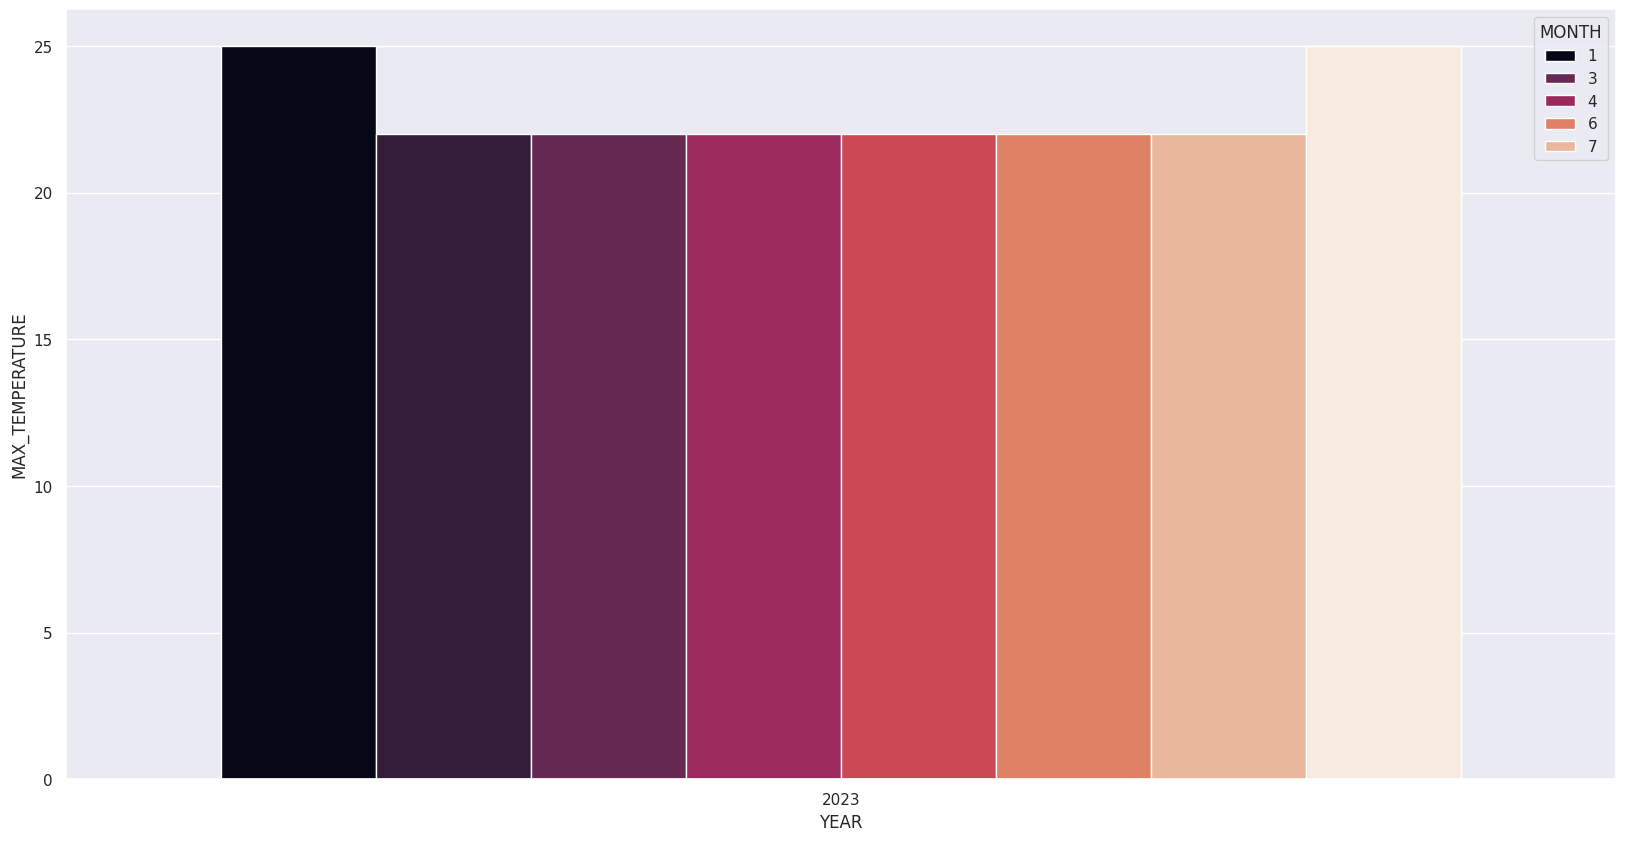

In [6]:
sns.barplot(data=stats_by_year_month, x="YEAR", y="MAX_TEMPERATURE", hue="MONTH", palette="rocket")
plt.show()